In [1]:
cd drive/My\ Drive/07\ -\ Advanced\ Convolutions/

/content/drive/My Drive/07 - Advanced Convolutions


# Imports
Importing necessary packages and modules

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from dataset.DataLoader import cifar10_dataset, dataset_classes
from dataset.DataDownloader import download_cifar10_dataset
from models.Utility import cross_entropy_loss, sgd_optimizer, model_summary, initialize_cuda, nll_loss
from models.NetworkArchitecture import Net
from models.Test import testModel
from models.Train import trainModel
from Plotter import plot_graph



In [4]:
class Params:

    num_workers = 4
    batchsize = 64
    dropout = 0.1
    random_seed = 1
    epochs = 40
    learning_rate = 0.01
    momentum = 0.9

Files already downloaded and verified


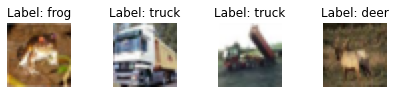

In [5]:
# Download data
cifar_dataset = download_cifar10_dataset()
classes = dataset_classes()
sample_data, sample_targets = cifar_dataset.data, cifar_dataset.targets

# Get image size
image_size = np.transpose(sample_data[5], (2, 0, 1)).shape

# Set number of images to display
num_images = 4

# Display images with labels
fig, axs = plt.subplots(1, 4, figsize=(6, 6))
fig.tight_layout()

for i in range(num_images):
    axs[i].axis('off')
    axs[i].set_title(f'Label: {classes[sample_targets[i]]}')
    axs[i].imshow(sample_data[i])

In [6]:
# Initialize CUDA and set random seed
cuda, device = initialize_cuda(Params.random_seed)

GPU Available? True


In [7]:
# Create train data loader
train_loader = cifar10_dataset(
    Params.batchsize, cuda, Params.num_workers, train=True
)

# Create val data loader
test_loader = cifar10_dataset(
    Params.batchsize, cuda, Params.num_workers, train=False
)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(Params.dropout).to(device)  # Create model
model_summary(model, image_size)  # Display model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,080
           Conv2d-11           [-1, 32, 16, 16]           9,248
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1, 32,

In [12]:
  losses = []
  accuracies = []
  incorrect_samples = []

  loss_fun = cross_entropy_loss() 
  optimizer = sgd_optimizer(model, Params.learning_rate, Params.momentum)  # Create optimizer
  for epoch in range(1, Params.epochs + 1):
      print(f'Epoch {epoch}:')
      trainModel(model, train_loader, device, optimizer, loss_fun)
      testModel(model, test_loader, device, loss_fun, losses, accuracies, incorrect_samples)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8412/10000 (84.12%)

Epoch 2:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8380/10000 (83.80%)

Epoch 3:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8424/10000 (84.24%)

Epoch 4:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8402/10000 (84.02%)

Epoch 5:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8380/10000 (83.80%)

Epoch 6:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8374/10000 (83.74%)

Epoch 7:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8419/10000 (84.19%)

Epoch 8:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8436/10000 (84.36%)

Epoch 9:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0082, Accuracy: 8368/10000 (83.68%)

Epoch 10:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8411/10000 (84.11%)

Epoch 11:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8430/10000 (84.30%)

Epoch 12:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8446/10000 (84.46%)

Epoch 13:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8414/10000 (84.14%)

Epoch 14:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 8435/10000 (84.35%)

Epoch 15:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8468/10000 (84.68%)

Epoch 16:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8467/10000 (84.67%)

Epoch 17:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0082, Accuracy: 8416/10000 (84.16%)

Epoch 18:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8454/10000 (84.54%)

Epoch 19:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8476/10000 (84.76%)

Epoch 20:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8440/10000 (84.40%)

Epoch 21:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8422/10000 (84.22%)

Epoch 22:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8517/10000 (85.17%)

Epoch 23:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8434/10000 (84.34%)

Epoch 24:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0083, Accuracy: 8398/10000 (83.98%)

Epoch 25:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8475/10000 (84.75%)

Epoch 26:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8448/10000 (84.48%)

Epoch 27:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 8488/10000 (84.88%)

Epoch 28:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8437/10000 (84.37%)

Epoch 29:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8476/10000 (84.76%)

Epoch 30:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8448/10000 (84.48%)

Epoch 31:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 8438/10000 (84.38%)

Epoch 32:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8465/10000 (84.65%)

Epoch 33:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8431/10000 (84.31%)

Epoch 34:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8435/10000 (84.35%)

Epoch 35:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8446/10000 (84.46%)

Epoch 36:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8475/10000 (84.75%)

Epoch 37:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8467/10000 (84.67%)

Epoch 38:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0084, Accuracy: 8385/10000 (83.85%)

Epoch 39:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 8431/10000 (84.31%)

Epoch 40:


Loss=0.51 Batch_ID=781 Accuracy=92.32: 100%|██████████| 782/782 [00:19<00:00, 39.41it/s]



Validation set: Average loss: 0.0081, Accuracy: 8443/10000 (84.43%)



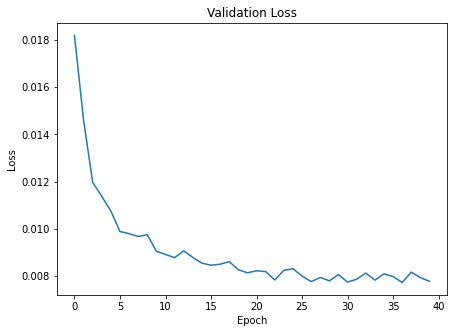

In [10]:
plot_graph(losses, "Loss")

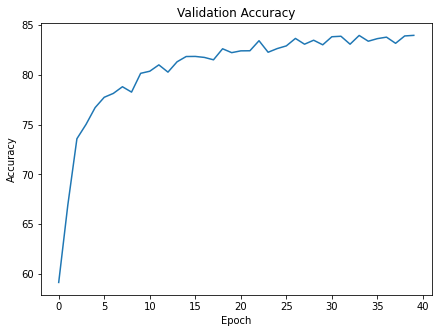

In [11]:
plot_graph(accuracies, "Accuracy")